<div class="alert alert-info" role="alert">
 <p class ="lead"> 
 <h1>Física Computacional </h1>
 <h2>Proyecto Final</h2>
 </div>

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/1/1f/Julia_Programming_Language_Logo.svg/1200px-Julia_Programming_Language_Logo.svg.png" style="height:42px;display:inline">

holiii

> Autores: Aquino Chapa Martha Abril, Castro Granados Celeste y Rizo Franco Samantha

In [5]:
using Plots

# Planteamiento del Problema:

1. **Ecuaciones del astronauta:**

$$ F_{Ax} = - \frac{G m_L m_A}{(x_A^2 + y_A^2)^{3/2}} x_A - \frac{G m_A m_H (x_A - x_H)}{((x_A - x_H)^2 + (y_A - y_H)^2)^{3/2}}- f_x $$

$$ \Rightarrow m_A \ddot{x_A} = - \frac{G m_L m_A}{(x_A^2 + y_A^2)^{3/2}} x_A - \frac{G m_A m_H (x_A - x_H)}{((x_A - x_H)^2 + (y_A - y_H)^2)^{3/2}}- f_x $$

$$ F_{Ay} = - \frac{G m_L m_A}{(x_A^2 + y_A^2)^{3/2}} y_A - \frac{G m_A m_H (y_A - y_H)}{((x_A - x_H)^2 + (y_A - y_H)^2)^{3/2}}- f_y$$

$$ \Rightarrow m_A \ddot{y_A} = - \frac{G m_L m_A}{(x_A^2 + y_A^2)^{3/2}} y_A - \frac{G m_A m_H (y_A - y_H)}{((x_A - x_H)^2 + (y_A - y_H)^2)^{3/2}}- f_y$$

Por lo tanto, las ecuaciones son:

$$ \ddot{x_A} = - \frac{G m_L}{(x_A^2 + y_A^2)^{3/2}} x_A - \frac{G m_H (x_A - x_H)}{((x_A - x_H)^2 + (y_A - y_H)^2)^{3/2}}- \frac{f_x}{m_A} $$

$$ \ddot{y_A} = - \frac{G m_L}{(x_A^2 + y_A^2)^{3/2}} y_A - \frac{G m_H (y_A - y_H)}{((x_A - x_H)^2 + (y_A - y_H)^2)^{3/2}}- \frac{f_y}{m_A}$$

2. **Ecuaciones de la herramienta:**

$$ F_{Hx} = - \frac{G m_L m_H}{(x_H^2 + y_H^2)^{3/2}} x_H - \frac{G m_A m_H (x_H - x_A)}{((x_H - x_A)^2 + (y_H - y_A)^2)^{3/2}}+ f_x $$

$$ \Rightarrow m \ddot{x_H} = - \frac{G m_L m_H}{(x_H^2 + y_H^2)^{3/2}} x_H - \frac{G m_A m_H (x_H - x_A)}{((x_H - x_A)^2 + (y_H - y_A)^2)^{3/2}}+ f_x $$


$$ F_{Hy} = - \frac{G m_L m_H}{(x_H^2 + y_H^2)^{3/2}} y_H - \frac{G m_A m_H (y_H - y_A)}{((x_H - x_A)^2 + (y_H - y_A)^2)^{3/2}}+ f_y$$

$$  \Rightarrow m \ddot{y_H} = - \frac{G m_L m_H}{(x_H^2 + y_H^2)^{3/2}} y_H - \frac{G m_A m_H (y_H - y_A)}{((x_H - x_A)^2 + (y_H - y_A)^2)^{3/2}}+ f_y$$

Por lo tanto, las ecuaciones son:

$$ \ddot{x_H} = - \frac{G m_L}{(x_H^2 + y_H^2)^{3/2}} x_H - \frac{G m_A (x_H - x_A)}{((x_H - x_A)^2 + (y_H - y_A)^2)^{3/2}}+ \frac{f_x}{m_H} $$

$$ \ddot{y_H} = - \frac{G m_L}{(x_H^2 + y_H^2)^{3/2}} y_H - \frac{G m_A (y_H - y_A)}{((x_H - x_A)^2 + (y_H - y_A)^2)^{3/2}}+\frac{f_y}{m_H}$$

In [6]:
### r=[xA,yA,vxA,vyA,xH,yH,vxH,vyH]
function orbita_AH(r,t)
    G=6.674e-11 #constante de gravitación universal
    mL=7.349e22 #masa de la luna
    mA=70 #masa del astronauta
    mH=5 #masa de la herramienta
    
    #definimos la norma de la herramienta
    rH=sqrt(r[5]^2 + r[6]^2)
    #definimos la norma del astronauta
    rA = sqrt(r[1]^2 + r[2]^2)
    #definimos la distancia del astronauta a la herramienta
    rAH=sqrt((r[1]-r[5])^2 + (r[2]-r[6])^2)
    
    fx=1 #componente x de la fuerza con que el astronauta empuja a la herramienta
    fy=1 #componente y de la fuerza con que el astronauta empuja a la herramienta
    
    #Ecuaciones del astronauta
    vxA = r[3]
    dvxA =  (G*mL*r[1])/(rA^3) - (fx/mA) #- #(G*mH*(r[1]-r[5]))/((rAH)^(3))
    
    vyA = r[4]
    dvyA =  (G*mL*r[2])/(rA^3) - (fy/mA) #- (G*mH*(r[2]-r[6]))/((rAH)^(3))
    
    #Ecuaciones de la herramienta
    vxH=r[7]
    dvxH= (G*mL*r[5])/(rH^3) + (fx/mH) #- (G*mA*(r[5]-r[1]))/((rAH)^(3))
    
    vyH=r[8]
    dvyH= (G*mL*r[6])/(rH^3) + (fx/mH) #- (G*mA*(r[6]-r[2]))/((rAH)^(3))

    return([vxA,dvxA,vyA,dvyA,vxH,dvxH,vyH,dvyH])
end    

orbita_AH (generic function with 1 method)

**Condiciones iniciales:** $x_{A_0}, y_{A_0}, x_{H_0}, y_{H_0}$

In [ ]:
function RK_4(edo,x_ini,t)
    sol = zeros( length(t) , length(x_ini) )
    sol[1,:] .= x_ini
    δ = t[2]-t[1]
    for i in 1:length(t)-1
        k1 = edo(sol[i,:],t[i])
        k2 = edo(sol[i,:] .+ 0.5*δ.*k1 , t[i] + 0.5*δ)
        k3 = edo(sol[i,:] .+ 0.5*δ.*k2 , t[i] + 0.5*δ)
        k4 = edo(sol[i,:] .+ δ.*k2 , t[i] + δ)
        sol[i+1,:] .= sol[i,:] .+ (δ/6.0).*(k1 .+ 2.0.*k2 .+ 2.0.*k3 .+ k4)
    end
    return sol
end

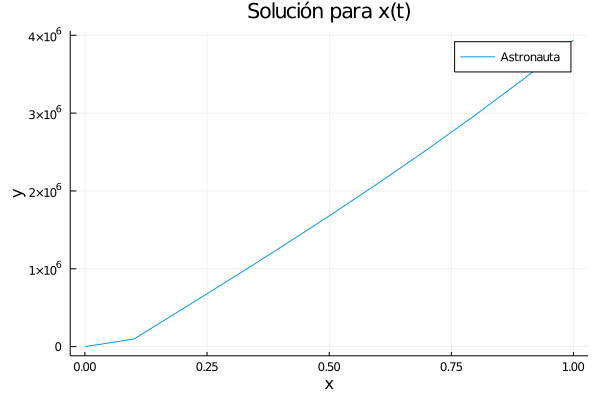

In [4]:
tiempo=collect(0:0.1:1)
cond_inic=[1.73e2, 1.73e2, 1, 1,1.73e2, 1.73e2, 1, 1]
solucion_a=RK_4(orbita_AH,cond_inic,tiempo)
xA=solucion_a[:,1]
yA=solucion_a[:,3]
xH=solucion_a[:,5]
yH=solucion_a[:,7]
radio=sqrt.(xA.^2+yA.^2)

plot(title="Solución para x(t)",xlabel="x",ylabel="y")
plot!(tiempo,radio,label="Astronauta",lw=1.0)
#plot!(tiempo,yA,label="Herramienta",lw=1.0)
#scatter!([0],[0],markershape=:star,markersize=10,markercolor=:yellow,label="Estrella",xlim=(-2,2),ylim=(-2,2))